# Default Credit Card Client -  Data Science Challenge
## Submitted by Minu Mathew

### The Task
Task 1 : Build a model to predict the likelihood of default, a model which can generalize to other data points. <br>
Task 2: Envision ways these predictions might be used in the company's product. <br>
Task 3 : There can be a few of the columns in the dataset, some commonly occurring values lack definitions in the documentation;  Try out different methods to deal with this incompleteness of information.
<br>

Main goal : Classification model to classify good customers(who do not default) vs bad customers(who default) <br>
The column to be predicted is 'default payment next month'. <br>

### Dataset Information <br>
Filename : default of credit card clients.xls<br>
Number of instances = 30,000<br>
Number of attribustes/columns = 24 <br>
Attribute characteristics : Interger, Real <br>
<br>
**Attribute information :** <br>
Target variable : default payment (Yes = 1, No = 0). The following 23 variables are explanatory variables:<br>
X1: Amount of the given credit (NT dollar). It includes both the individual consumer credit and his/her family (supplementary) credit. <br>
X2: Gender (1 = male; 2 = female).<br>
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).<br>
X4: Marital status (1 = married; 2 = single; 3 = others).<br>
X5: Age (year).<br>
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: <br>
X6 = the repayment status in September, 2005; <br>
X7 = the repayment status in August, 2005; <br>
X8 = the repayment status in July <br>
X9 = the repayment status in June <br>
X10 = the repayment status in May <br>
X11 = the repayment status in April, 2005. <br>
The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.<br>
X12-X17: Amount of bill statement (NT dollar). <br>
X12 = amount of bill statement in September, 2005; <br>
X13 = amount of bill statement in August, 2005; <br>
X14 = amount of bill statement in July <br>
X15 = amount of bill statement in June <br>
X16 = amount of bill statement in May <br>
X17 = amount of bill statement in April, 2005.<br>
X18-X23: Amount of previous payment (NT dollar).<br>
X18 = amount paid in September, 2005; <br>
X19 = amount paid in August, 2005; <br>
X20 = amount paid in July <br>
X21 = amount paid in June <br>
X22 = amount paid in May <br>
X23 = amount paid in April, 2005.<br>






In [1]:
# installing required packages
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

In [2]:
# download data and load spamdataset to local storage
import urllib.request
import os
def download_data():
    url='https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'
    urllib.request.urlretrieve(url, 'default of credit card clients.xls')

download_data()

### Loading data into dataframe

In [152]:
df = pd.read_excel('default of credit card clients.xls')
df.to_csv('credit_card_default.csv', index=None, header=True)

### Initial EDA

In [153]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [154]:
# change column headers to be more meaningful
df.columns = df.iloc[0]
df = df[1:]
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [155]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

**Check categorical variables for valid inputs**

In [156]:
categorical =['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5','PAY_6', 'default payment next month']
for col in categorical:
    print(col, np.sort(df[col].unique()))

SEX [1 2]
EDUCATION [0 1 2 3 4 5 6]
MARRIAGE [0 1 2 3]
PAY_0 [-2 -1 0 1 2 3 4 5 6 7 8]
PAY_2 [-2 -1 0 1 2 3 4 5 6 7 8]
PAY_3 [-2 -1 0 1 2 3 4 5 6 7 8]
PAY_4 [-2 -1 0 1 2 3 4 5 6 7 8]
PAY_5 [-2 -1 0 2 3 4 5 6 7 8]
PAY_6 [-2 -1 0 2 3 4 5 6 7 8]
default payment next month [0 1]


In [157]:

df['PAY_0'].value_counts().sort_index()

-2     2759
-1     5686
 0    14737
 1     3688
 2     2667
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
Name: PAY_0, dtype: int64

In [158]:
df['PAY_2'].value_counts(normalize=True).sort_index()

-2   0.1261
-1   0.2017
 0   0.5243
 1   0.0009
 2   0.1309
 3   0.0109
 4   0.0033
 5   0.0008
 6   0.0004
 7   0.0007
 8   0.0000
Name: PAY_2, dtype: float64

In [159]:
df['PAY_3'].value_counts(normalize=True).sort_index()

-2   0.1362
-1   0.1979
 0   0.5255
 1   0.0001
 2   0.1273
 3   0.0080
 4   0.0025
 5   0.0007
 6   0.0008
 7   0.0009
 8   0.0001
Name: PAY_3, dtype: float64

In [160]:
df.loc[df['PAY_3'] == -2]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
10,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0
19,19,360000,2,1,1,49,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
20,20,180000,2,1,2,29,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
24,24,450000,2,1,1,40,-2,-2,-2,-2,...,560,0,0,19428,1473,560,0,0,1128,1
34,34,500000,2,2,1,54,-2,-2,-2,-2,...,7521,71439,8981,4152,22827,7521,71439,981,51582,0
35,35,500000,1,1,1,58,-2,-2,-2,-2,...,3180,0,5293,5006,31178,3180,0,5293,768,0
36,36,160000,1,1,2,30,-1,-1,-2,-2,...,-923,-1488,-1884,131,396,396,565,792,0,0
46,46,210000,1,1,2,29,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
53,53,310000,2,2,1,49,-2,-2,-2,-2,...,11185,3544,464,7875,7600,11185,3544,464,0,0
56,56,500000,2,1,1,45,-2,-2,-2,-2,...,0,151,2530,3640,162,0,151,2530,0,0


In [163]:
df.loc[(df['PAY_0'] == -2) & (df['PAY_2'] == -2) & (df['PAY_3'] == -2) & (df['PAY_4'] == -2) & 
       (df['PAY_5'] == -2) & (df['PAY_6'] == -2)]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
24,24,450000,2,1,1,40,-2,-2,-2,-2,...,560,0,0,19428,1473,560,0,0,1128,1
34,34,500000,2,2,1,54,-2,-2,-2,-2,...,7521,71439,8981,4152,22827,7521,71439,981,51582,0
35,35,500000,1,1,1,58,-2,-2,-2,-2,...,3180,0,5293,5006,31178,3180,0,5293,768,0
46,46,210000,1,1,2,29,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
53,53,310000,2,2,1,49,-2,-2,-2,-2,...,11185,3544,464,7875,7600,11185,3544,464,0,0
56,56,500000,2,1,1,45,-2,-2,-2,-2,...,0,151,2530,3640,162,0,151,2530,0,0
93,93,100000,2,1,2,27,-2,-2,-2,-2,...,0,0,0,7555,0,0,0,0,0,0
101,101,140000,1,1,2,32,-2,-2,-2,-2,...,415,100,1430,10212,850,415,100,1430,0,0
144,144,170000,1,2,2,29,-2,-2,-2,-2,...,10000,9983,15846,10000,10000,10000,9983,15863,10000,0
167,167,370000,1,1,2,50,-2,-2,-2,-2,...,15398,4792,13453,15383,8204,15413,4792,13453,4699,0


**Column values**<br>
Columns with valid inputs as per UCI data description: <br>
SEX, default payment next month. <br>
default payment next month = 
* Yes(1) if customer defaults payment for the month of October
* No(0) if customer does not default for the month of October

<br>
Columns with invalid/extra categories not defined in UCI data description: <br>
1. EDUCATION has values 0,1,2,3,4,5,6. Will treat 0,5 and 6 as unknown. <br>
2. MARRIAGE has values 0,1,2,3. Will treat 0=unknown. <br>
3. PAY_0 to PAY_2, .., PAY_6 has values of -2 and 0 not mentioned in the description.<br> 
    * Around 30% of the values are -2 and 0.<br>
    * On data exploration, PAY_0,.. PAY_6 values having values -2, I did not find any interesting patterns/insights. There seems to be a higher percentage of BILL_AMT values =0. Other than that, could not find anything in the data.
    * We need good data as input to ML models as the implications of a decision made by ML modeling in fintech is high.<br>
    * 1,2,3,4,5,6,7,8 gives the number of months of delay<br>
    * Treating 0 as duly paid.<br>
    * Convert -2,-1 to 0 as negative number of months is not valid. <br>
<br>

Change PAY_0 column name to PAY_1 as it is more similar to other column names (BILL_AMT_1, PAY_AMT_1)<br>
<br>

**Notes**<br>
<br>
Binary target variable. <br>
All categorical variables are transformed to integers. <br>
Each row is treated as a unique customer. Customer ID is the same as row ID <br>
Some PPI like gender, age, martial status is present in the data.<br>
We treat the length of loans/credit to be the same for all customers. The target variable(ground truth) is determined after that loan period is over.<br>
LIMIT_BAL, amount of credit : includes individual+family credit. However, no family attributes like number of members/household income etc is given. Since each invidual is given a probability score of likelihood of default, we will treat this as individual credit. Assume that this credit is given before April 2005. <br>


**Data transformation and cleaning**

In [164]:
# check for null values
df.isnull().sum().sort_values(ascending=False) # no null values

0
default payment next month    0
PAY_6                         0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
BILL_AMT1                     0
PAY_AMT6                      0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
ID                            0
dtype: int64

If null values were present, we would have to think about whether to impute/fill with other values or not.<br>
There are models that can deal with null values. If null values are present, we would need to resort to those models. <br>
If a high percentage of samples are nulls, we have to think about imputing the fields. <br>
Before imputation, some general idea about the data is necessary. <br>
Is there outliers or not? If outliers, the mean of the sampled data(non nulls) might be skewed towards the outlier. Median is more robust. <br>
The aim is to best preserve the data representation, ie fill the null values that best represent the data statistics. <br>

In [165]:
list(df.columns)

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [166]:
# change col name PAY_0 to PAY_1
df.rename(columns = {'PAY_0':'PAY_1'}, inplace = True) 

In [167]:
df['PAY_1'] = df['PAY_1'].replace([-1, -2],0)
df['PAY_2'] = df['PAY_2'].replace([-1, -2],0)
df['PAY_3'] = df['PAY_3'].replace([-1, -2],0)
df['PAY_4'] = df['PAY_4'].replace([-1, -2],0)
df['PAY_5'] = df['PAY_5'].replace([-1, -2],0)
df['PAY_6'] = df['PAY_6'].replace([-1, -2],0)

In [168]:
df['PAY_5'].unique()

array([0, 2, 3, 5, 4, 7, 8, 6], dtype=int64)

In [169]:
# change target variable name from 'default payment next month' to 'default' for ease of use
df.rename(columns = {'default payment next month':'default'}, inplace = True) 

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
ID           30000 non-null object
LIMIT_BAL    30000 non-null object
SEX          30000 non-null object
EDUCATION    30000 non-null object
MARRIAGE     30000 non-null object
AGE          30000 non-null object
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null object
BILL_AMT2    30000 non-null object
BILL_AMT3    30000 non-null object
BILL_AMT4    30000 non-null object
BILL_AMT5    30000 non-null object
BILL_AMT6    30000 non-null object
PAY_AMT1     30000 non-null object
PAY_AMT2     30000 non-null object
PAY_AMT3     30000 non-null object
PAY_AMT4     30000 non-null object
PAY_AMT5     30000 non-null object
PAY_AMT6     30000 non-null object
default      30000 non-null object
dtypes: int64(6), obje

**Unexpected data type**<br>
LIMIT_BAL, BILL_AMT1, BILL_AMT2,...BILL_AMT6, PAY_AMT1,PAY_AMT2,..PAY_AMT6 are objects / categorical variables in the df. <br>
These columns are dollar amounts and should be treated as real numbers. <br>
AGE also should be numeric. <br>
Target variable 'default' is transformed to numeric datatype to easy of use of metrics and correlation plots later. <br>
Convert these to numeric data type.

In [171]:
obj_cols = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
df[obj_cols] = df[obj_cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [172]:
df['AGE'] = pd.to_numeric(df['AGE'])
df['default'] = pd.to_numeric(df['default'])

In [173]:
df.shape

(30000, 25)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
ID           30000 non-null object
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null object
EDUCATION    30000 non-null object
MARRIAGE     30000 non-null object
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null int64
dtypes: int64(21), object(4)
memory u

### Updated Dataset Information
The column names are changed to be more meaningful. The headers have been changed. <br>
**Features** <br>
Variable	  &emsp; &emsp; &emsp;     Description<br>
ID	 &emsp; (object dtype) ID of each client<br>
LIMIT_BAL &emsp;	(numeric) Amount of given credit in NT dollars (includes individual and family/supplementary credit)<br>
SEX	&emsp; Gender  (object dtype) (1=male, 2=female)<br>
EDUCATION &emsp; (object dtype) (0=unknown, 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)<br>
MARRIAGE	 &emsp; (object dtype) Marital status (0=unknown, 1=married, 2=single, 3=others)<br>
AGE	&emsp; (numeric) Age in years<br>
PAY_1	 &emsp; (numeric) Repayment status in September, 2005 (0=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)<br>
PAY_2	 &emsp; (numeric) Repayment status in August, 2005 <br>
PAY_3	 &emsp; (numeric) Repayment status in July, 2005 <br>
PAY_4	 &emsp; (numeric) Repayment status in June, 2005 <br>
PAY_5	&emsp; (numeric) Repayment status in May, 2005 <br>
PAY_6	&emsp; (numeric) Repayment status in April, 2005 <br>
BILL_AMT1	&emsp; (numeric) Amount of bill statement in September, 2005 (NT dollar)<br>
BILL_AMT2	&emsp; (numeric) Amount of bill statement in August, 2005 <br>
BILL_AMT3	&emsp; (numeric) Amount of bill statement in July, 2005 <br>
BILL_AMT4	&emsp; (numeric) Amount of bill statement in June, 2005 <br>
BILL_AMT5	&emsp; (numeric) Amount of bill statement in May, 2005 <br>
BILL_AMT6	&emsp; (numeric) Amount of bill statement in April, 2005 <br>
PAY_AMT1	&emsp; (numeric) Amount of previous payment in September, 2005 (NT dollar)<br>
PAY_AMT2	&emsp; (numeric) Amount of previous payment in August, 2005 <br>
PAY_AMT3	&emsp; (numeric) Amount of previous payment in July, 2005<br>
PAY_AMT4	&emsp; (numeric) Amount of previous payment in June, 2005 <br>
PAY_AMT5	&emsp; (numeric) Amount of previous payment in May, 2005 <br>
PAY_AMT6	&emsp; (numeric) Amount of previous payment in April, 2005 <br>
default 	&emsp; (numeric) Defaulted October month payment (1=yes, 0=no)<br>



### Extensive EDA

In [40]:
print(df['default'].value_counts())
df['default'].value_counts(normalize=True)

0    23364
1     6636
Name: default, dtype: int64


0    0.7788
1    0.2212
Name: default, dtype: float64

77% of clients are good and 22% of clients defaulted.<br>
Class imbalanced dataset. <br>
Need to have KPIs/metrics that reflect this imbalance<br>

In [49]:
# LIMIT_BAL description
df['LIMIT_BAL'].describe()


count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

min=10,000(ten thousand); max=1,000,000(1 million). Q2 is at 140,000 and mean at 167,484. <br>
High variance / wider range for LIMIT_BAL.

C:\Users\minum\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


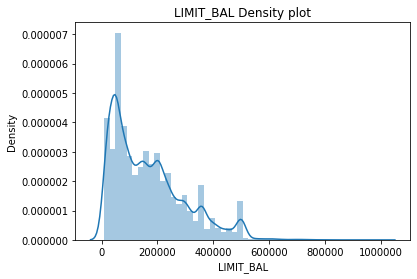

In [61]:
sns.distplot(df.LIMIT_BAL)
plt.title('LIMIT_BAL Density plot')
plt.show()

Highly skewed plot. Most people have balances <200,000. <br>
There is a long tail at the right showing a minority with high balance amounts.

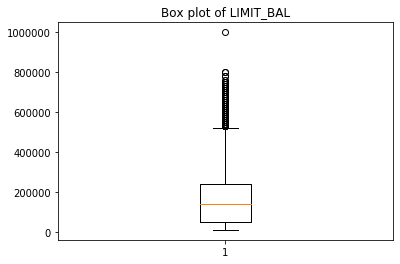

In [88]:
plt.boxplot(df['LIMIT_BAL'])
plt.title('Box plot of LIMIT_BAL')
plt.show()

Q3+1.5*IQR is higher. Gives the impression of a skewed distribution. Same as in the density plot above.

In [52]:
# Repayment status description
df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000
mean,0.356767,0.320033,0.304067,0.258767,0.22150,0.226567
std,0.760594,0.801727,0.790589,0.761113,0.71772,0.715438
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000


Most values are around 0. Q1, Q2 and Q3 = 0. Mean is close to 0 for all columns. <br>
Mean and std are similar for all columns/payment months.

In [56]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [57]:
# Amount of bill statement description
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.0000,30000.0000,30000.0000,30000.0000,30000.0000,30000.0000
mean,51223.3309,49179.0752,47013.1548,43262.9490,40311.4010,38871.7604
std,73635.8606,71173.7688,69349.3874,64332.8561,60797.1558,59554.1075
min,-165580.0000,-69777.0000,-157264.0000,-170000.0000,-81334.0000,-339603.0000
25%,3558.7500,2984.7500,2666.2500,2326.7500,1763.0000,1256.0000
50%,22381.5000,21200.0000,20088.5000,19052.0000,18104.5000,17071.0000
75%,67091.0000,64006.2500,60164.7500,54506.0000,50190.5000,49198.2500
max,964511.0000,983931.0000,1664089.0000,891586.0000,927171.0000,961664.0000


There are negative bill amounts. Can be treated as credit. <br>
The amount to be paid < Already paid amount. <br>
Min values are negative for all months. Max values are high and varied across the months. <br>
Mean also ranges from 38,871 to 51,223$ <br>

**KDE Plot** described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable. It depicts the probability density at different values in a continuous variable.

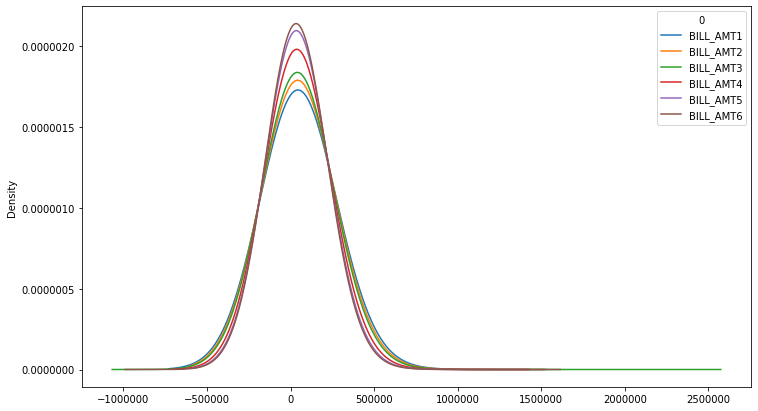

In [70]:

bill_amt_data=df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6' ]]
ax = bill_amt_data.plot.kde(figsize=(12,7),bw_method=3)  # changing estimator bandwidth

Distribution of different months is almost the same. <br>
The frequency of the mean value does increase a bit from BILL_AMT1(lowest density) to BILL_AMT6(highest density)

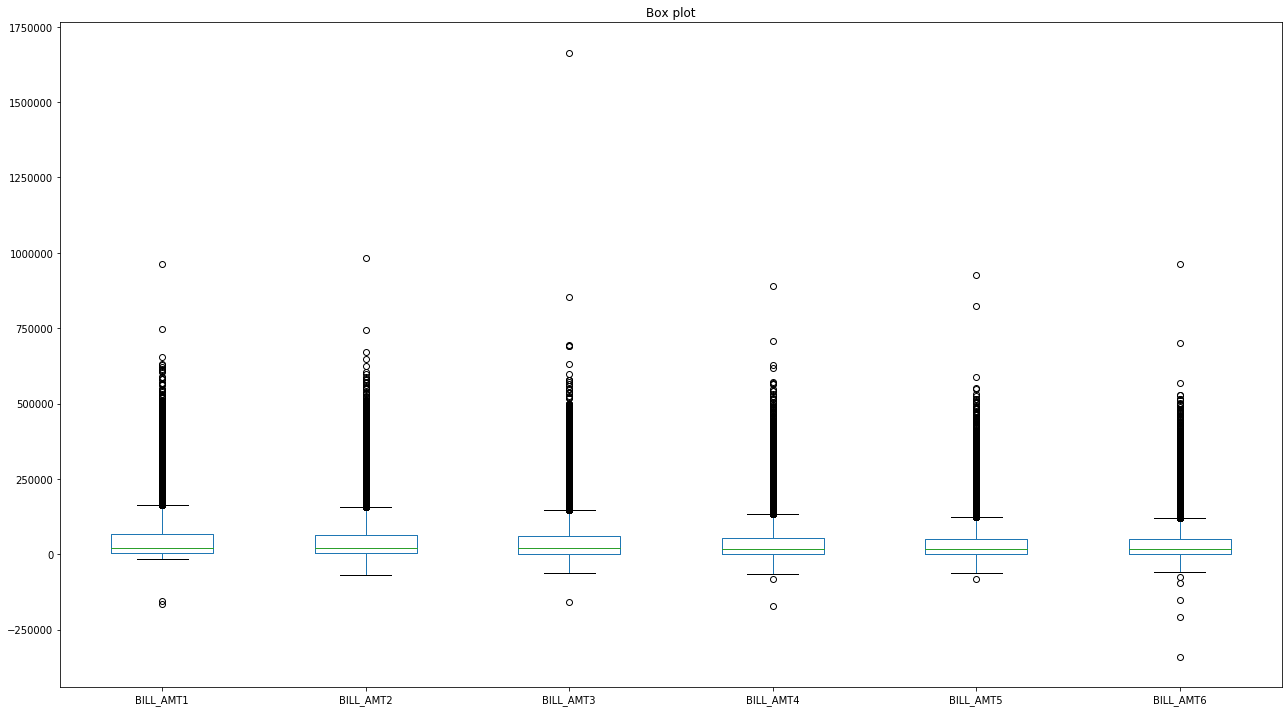

In [85]:
df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 
    'BILL_AMT5', 'BILL_AMT6' ]].plot.box(figsize=(18,10),title='Box plot',legend=True);
plt.tight_layout()
#tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area

BILL_AMT3 has one outlier in the positive side, which is pretty high value comparatively. <br>
This is because of the high max value for BILL_AMT3. <br>

**Product Recommendations**<br>
BILL_AMT3 is the bill statement of a particular user for the month of July 2005. <br>
Comparing the bill statements of that particular user for previous months, we can say if this is an outlier or not. <br>
This insight can be used for nudging the user on the high spending for the month. Can include recommendations on saving strategies and can include how that bill statement can affect the credit score.<br>
Looking into the transactions that incurred the high cost, we can recommend credit cards for that purpose.<br>
If we have every transactions of a particular user, we can also recommend credit cards/deals/offers based on the most used category(grocery, airlines, hotels, fuel).

In [62]:
# Amount of previous payment description
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.0000,30000.0000,30000.0000,30000.0000,30000.0000,30000.0000
mean,5663.5805,5921.1635,5225.6815,4826.0769,4799.3876,5215.5026
std,16563.2804,23040.8704,17606.9615,15666.1597,15278.3057,17777.4658
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,1000.0000,833.0000,390.0000,296.0000,252.5000,117.7500
50%,2100.0000,2009.0000,1800.0000,1500.0000,1500.0000,1500.0000
75%,5006.0000,5000.0000,4505.0000,4013.2500,4031.5000,4000.0000
max,873552.0000,1684259.0000,896040.0000,621000.0000,426529.0000,528666.0000


Min amount paid for all months =0 <br>
Max amount paid varies for the months. <br>
Mean amount paid is in the range 4,700 to 5,900$

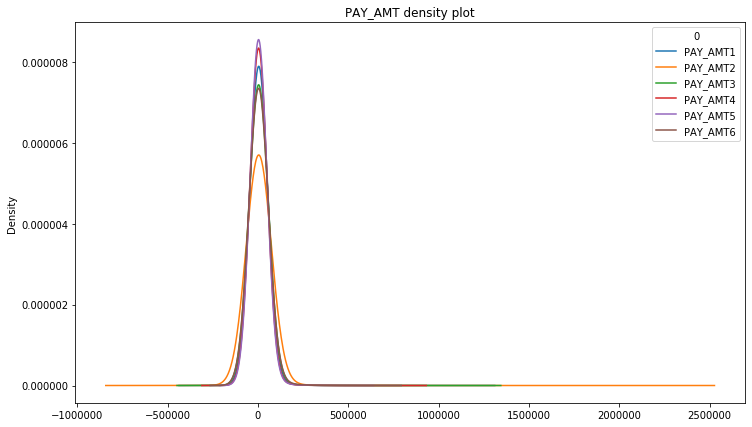

In [71]:
pay_amt_data=df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6' ]]
ax = pay_amt_data.plot.kde(figsize=(12,7),bw_method=3)  # changing estimator bandwidth
plt.title('PAY_AMT density plot')
plt.show()

Long tails for PAY_AMT2(previous payment amount for month of Aug 2005). <br>


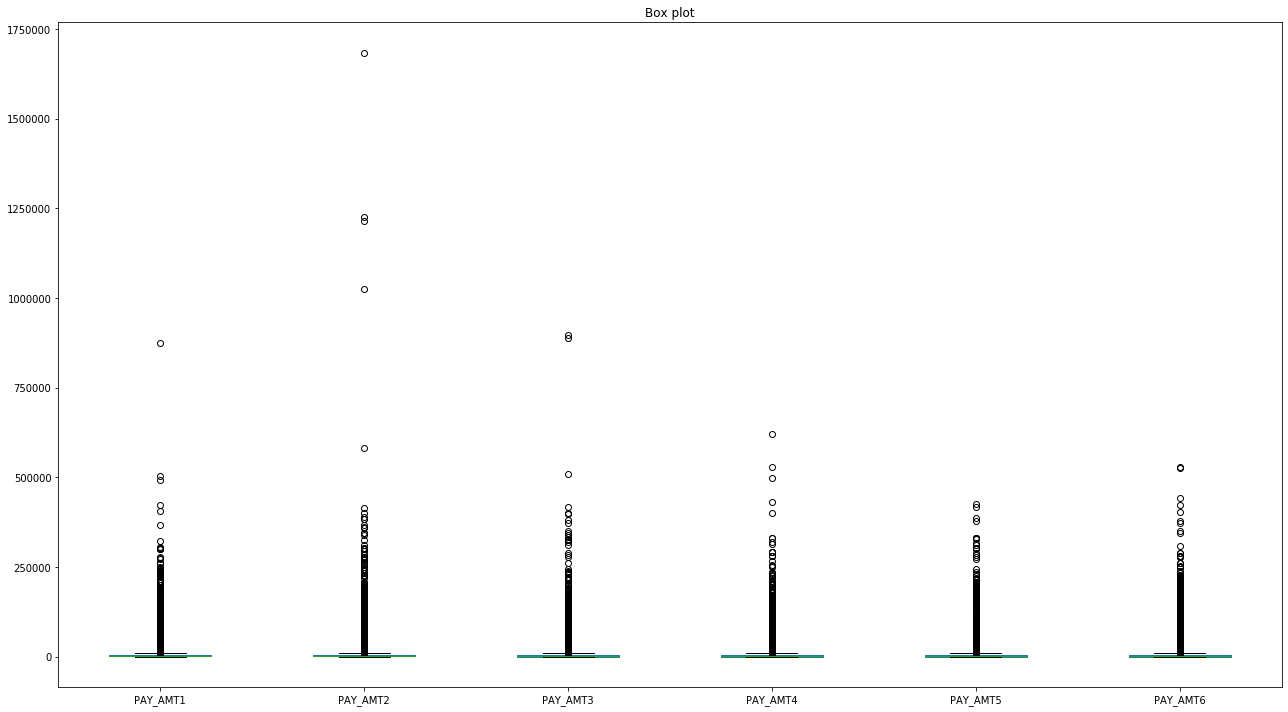

In [86]:
df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 
    'PAY_AMT5', 'PAY_AMT6'  ]].plot.box(figsize=(18,10),title='Box plot',legend=True);
plt.tight_layout()
#tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area

The long tail for PAY_AMT2 is made more clear in the box plot. PAY_AMT2 has more outliers.

In [63]:
df['AGE'].describe()

count   30000.0000
mean       35.4855
std         9.2179
min        21.0000
25%        28.0000
50%        34.0000
75%        41.0000
max        79.0000
Name: AGE, dtype: float64

Customer ages range from 21 to 79. With mean age 35.5<br>
The customer ranges from youth to senior citizens. <br>

C:\Users\minum\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


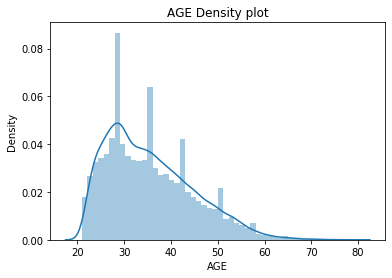

In [64]:
sns.distplot(df.AGE)
plt.title('AGE Density plot')
plt.show()

In [65]:
print(df['SEX'].value_counts())
df['SEX'].value_counts(normalize=True)
# (1 = male; 2 = female)

2    18112
1    11888
Name: SEX, dtype: int64


2   0.6037
1   0.3963
Name: SEX, dtype: float64

More female than men in the customer base

In [66]:
print(df['MARRIAGE'].value_counts())
df['MARRIAGE'].value_counts(normalize=True)
# MARRIAGE   (object dtype) Marital status (0=unknown, 1=married, 2=single, 3=others)

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64


2   0.5321
1   0.4553
3   0.0108
0   0.0018
Name: MARRIAGE, dtype: float64

Most are single followed by married. This makes sense as most of the age group is under 35.

In [67]:
print(df['EDUCATION'].value_counts())
df['EDUCATION'].value_counts(normalize=True)
# EDUCATION   (object dtype) (0=unknown, 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64


2   0.4677
1   0.3528
3   0.1639
5   0.0093
4   0.0041
6   0.0017
0   0.0005
Name: EDUCATION, dtype: float64

University and grad school students make up around 50% of the customer base. <br>
**Product Recommendations**<br>
Since the customer base are single college students, we can target to that crowd by bringing more features that cater to their needs. <br>
Example : student loans, discounts in restuarants & bars using cash/credit card, offers/deals for electronic gadgets. <br> 

**Get the distribution of LIMIT_BAL vs default(target)**

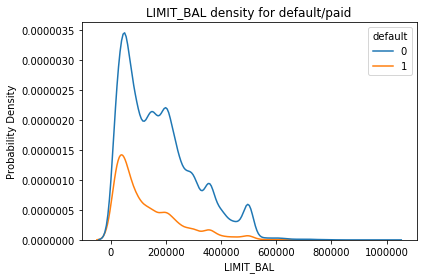

In [78]:
#sns.kdeplot(df.loc[(df['default']==1), 'LIMIT_BAL'], color='r', shade=True, label='default(1)', legend=True) 
  
#sns.kdeplot(df.loc[(df['default']==0),  'LIMIT_BAL'], color='g', shade=True, label='paid(0)', legend=True) 
sns.kdeplot(data=df, x="LIMIT_BAL", hue="default")
plt.xlabel('LIMIT_BAL') 
plt.ylabel('Probability Density')
plt.title('LIMIT_BAL density for default/paid')
plt.show()

Both default and paid customers have similar distribution of LIMI_BAL. <br>
LIMIT_BAL>400,000 are more likely to pay/be good customers.<br>
The higher density of LIMI_BAL in paid customers is accounted for the majority class being paid class.

**Get the distribution of AGE vs default(target)**

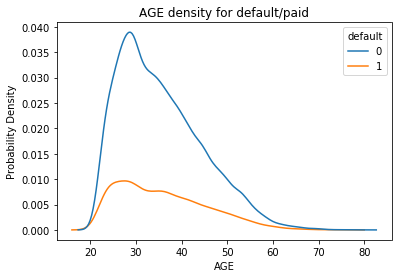

In [79]:
sns.kdeplot(data=df, x="AGE", hue="default")
plt.xlabel('AGE') 
plt.ylabel('Probability Density')
plt.title('AGE density for default/paid')
plt.show()

Not much difference in AGE feature.<br>
This feature belongs to PPI category and must not be used for segmenting / targeting customers for productionized models. <br>


**Check features SEX, MARRIAGE, EDUCATION, AGE vs target**

SEX, MARRIAGE, EDUCATION are PIIs. These features should not be used to target/segment/discriminate customers. <br>
Should not be used as a criteria to deny/accept loans. <br>
However, for the purpose of this exercise, deep dive into the insights from the data.<br>

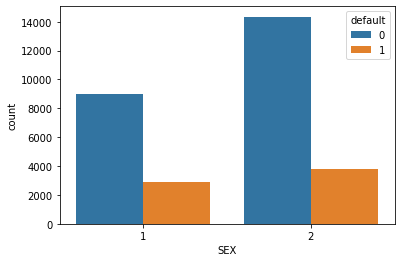

In [125]:
sns.countplot(data=df, x='SEX', hue='default');

In [81]:
pd.crosstab(df.SEX, df.default)

default,0,1
SEX,,
1,9015,2873
2,14349,3763


In [82]:
pd.crosstab(df.SEX, df.default, normalize='index')

default,0,1
SEX,,
1,0.7583,0.2417
2,0.7922,0.2078


75% of males do not default and 24% males have defaulted. <br>
79% feamles do not default and 20% females default. <br>
Females are more likely to be good customers as their default rate is lower.<br>
PS : This should not be included in a model in production. Example : Apple card story, Amazon resume screening.<br>

Checking age vs sex vs default rate

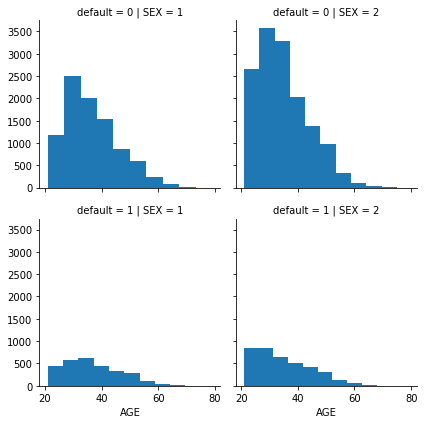

In [83]:
g = sns.FacetGrid(df, row='default', col='SEX')
g = g.map(plt.hist, 'AGE')

Other than the higher frequency/density of default=0 and SEX=2(females), not much difference can be obtained.

**Check Marriage vs default**

In [89]:
pd.crosstab(df.MARRIAGE, df.default, normalize='index')
# Marital status (0=unknown, 1=married, 2=single, 3=others)

default,0,1
MARRIAGE,,
0,0.9074,0.0926
1,0.7653,0.2347
2,0.7907,0.2093
3,0.7399,0.2601


76% of Married people are good customers and 23% of married people default.<br>
79% of single people are good customers and 20% default <br>
This is also a feature that should not be used in production models.<br>

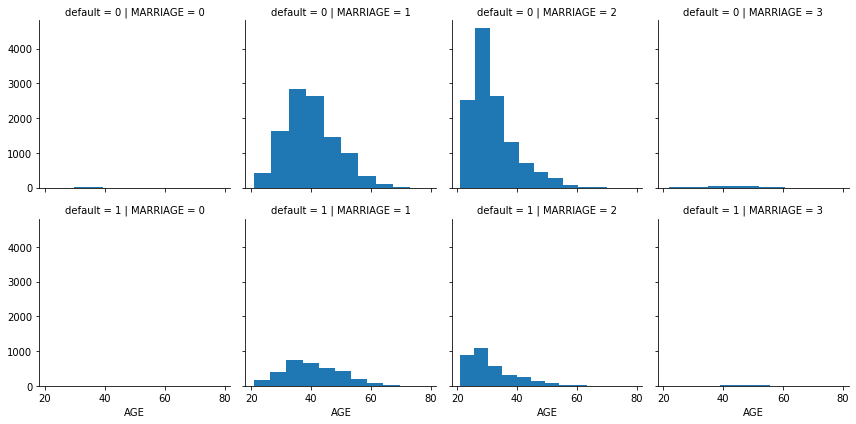

In [90]:
g = sns.FacetGrid(df, row='default', col='MARRIAGE')
g = g.map(plt.hist, 'AGE')

Most of the single people are below 40(with highest frequency around 30) and are good customers.<br>


**Check Education vs default**

In [91]:
pd.crosstab(df.EDUCATION, df.default, normalize='index')
# EDUCATION   (object dtype) (0=unknown, 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

default,0,1
EDUCATION,,
0,1.0000,0.0000
1,0.8077,0.1923
2,0.7627,0.2373
3,0.7484,0.2516
4,0.9431,0.0569
5,0.9357,0.0643
6,0.8431,0.1569


80% of graduate school students are good customers and 19% are bad customers.<br>
76% of university students are good customer annd 23% are bad customers<br>
74% of high school students are good customers and 25% default<br>
Education type others and unknown have a high chance of being a good customer. But this is due to the minimum number of people in those classes. <br>

**Check LIMIT_BAL, AGE vs target**

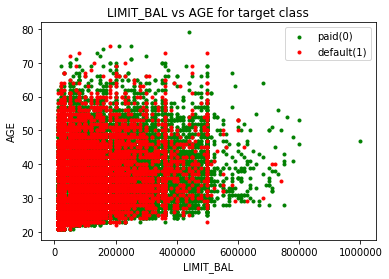

In [95]:
y0 = df.AGE[df["default"] == 0]
y1 = df.AGE[df["default"] == 1]
x0 = df.LIMIT_BAL[df["default"] == 0]
x1 = df.LIMIT_BAL[df["default"] == 1]

plt.scatter(x0,y0, color="g", marker='.',label='paid(0)')
plt.scatter(x1,y1, color="r", marker='.',label='default(1)')
plt.xlabel("LIMIT_BAL")
plt.ylabel("AGE")
plt.title('LIMIT_BAL vs AGE for target class')
plt.legend()
plt.show()

No correlation with age and LIMIT_BAL.<br>
LIMIT_BAL>500,000 tends to have good customers.<br>

**Check features SEX, EDUCATION, MARRIAGE vs LIMIT_BAL**<br>
Aim to find/categorize clients with higher credit.<br>


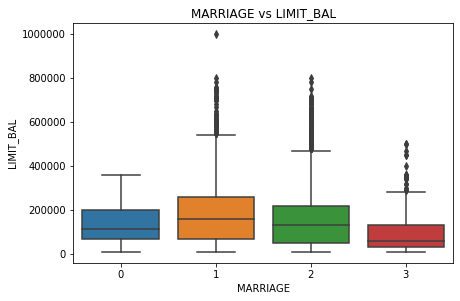

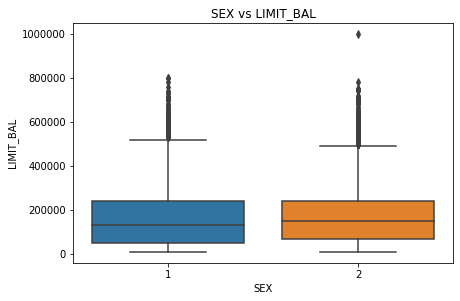

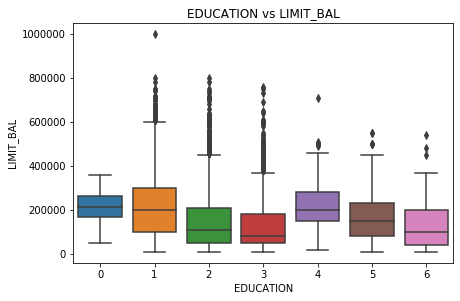

In [151]:
for col in ['MARRIAGE', 'SEX', 'EDUCATION']:
    plt.figure(figsize=(15,15))
    plt.subplot(3,2,1)
    sns.boxplot(data=df, y='LIMIT_BAL', x=col)
    plt.title(col + ' vs LIMIT_BAL')

plt.show()

Not much difference in SEX.<br>
EDUCATION   (object dtype) (0=unknown, 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)<br>
MARRIAGE   (object dtype) Marital status (0=unknown, 1=married, 2=single, 3=others)<br>
<br>
MARRIAGE=1 (married) has higher credit compared to other categories. <br>
EDUCATION=3(high school) has the lowest credit. <br>
<br>
**Product Recommendations**<br>
Married people has the most credit. We can get them to spend more on the platform. Improve product / offer recommendations for that category. <br>
High school students do not have much credit to spend. Can recommend products/strategies that help them increase their credit score and credit. <br>

**Check correlations of all numerical variables with target**

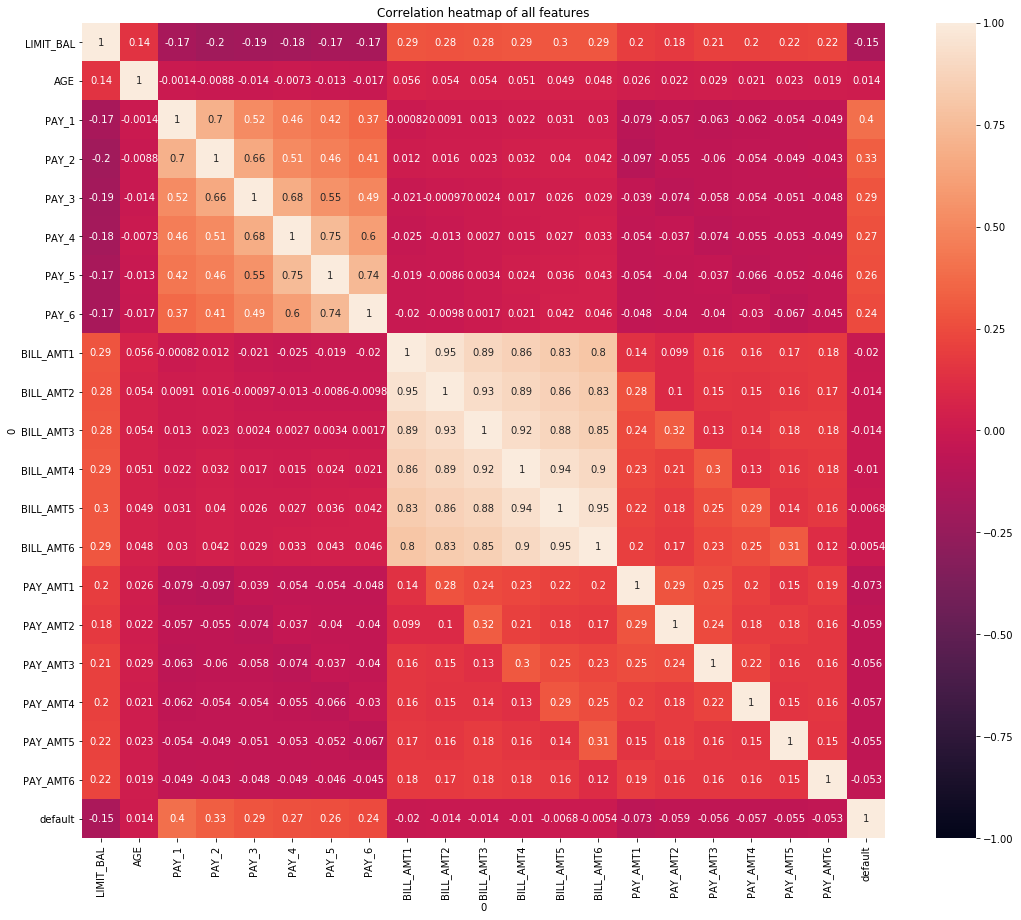

In [105]:
corr_matrix= df.corr()
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix,annot=True, vmin=-1.0)
plt.title('Correlation heatmap of all features')
plt.show()

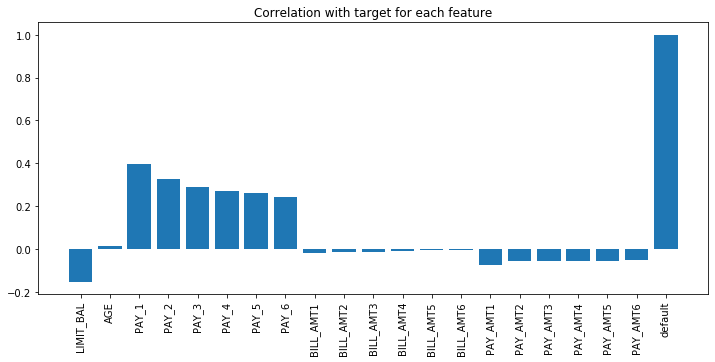

In [106]:
fig  = plt.subplots(figsize=(12,5))
plt.bar(x=corr_matrix.index.tolist(),height=corr_matrix['default'])
plt.xticks(rotation=90)
plt.title('Correlation with target for each feature')
plt.show()

None of the variables/features have high correlation(postive or negative) with the default(target variable). <br>
The feature with most correlation(+0.4) with target(default ) is PAY_1 (months of delay in payment for the month of Sept). <br>
This makes sense as the target variable is whether the customer defaults in the payment for October.<br>
<br>
The LIMI_BAL has the most negative correlation with default(target). This is expected as the credit increases, the risk of a customer decreases. <br>
Similarly for PAY_AMT1,..,PAY_AMT6. As the amount of payments made increase, the less riskier is the customer.<br>
LIMIT_BAL has a slight positive correlation with BILL_AMT1,..BILL_AMT6 and PAY_AMT1,..,PAY_AMT6. This is can be seen as when the amount of bill statements increase, credit score is affected postively(because of spending habits). And when the customer pays back the credit amount(seen in PAY_AMT1 to PAY_AMT6 columns), the score/credit increases due to paying habits of the customer.

<br>
PAY_1, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6 have moderate to high correlation with each other, as expected. <br>
BILL_AMT1,BILL_AMT2, .. , BILL_AMT6 have a high correlation(>0.85) with each other, as expected. This means that is bill statement for April is high, it is likely that the customer spends that much amount of money every month. <br>
This high correlation is not there for PAY_AMT1, PAY_AMT2,... PAY_AMT6. This means that if the customer pays less in August, it does not mean that the customer will pay more or less in the previous or next months. There is no pattern (at least in first glance) in the previous payments made by the customer. <br>

Was expecting LIMIT_BAL , BILL_AMT1(bill statement for Sept month), and PAY_AMT1(amount of previous payment in the month of Sept) to have a strong correlation with the target variable. This is under the assumption that the target variable is whether the customer defaults or not in October. <br>
However, from this data, we can see that there are many factors for defaulting and we are just exploring some features.<br>


### Future Work
**Deep dive** on LIMIT_BAL, BILL_AMT1 and PAY_AMT1 for default and paid customers. Check if there is a pattern/trend.<br>
We are also interested in the payment patterns of the customer. May be a deep dive into PAY_AMT1, PAY_AMT2,... PAY_AMT6 can lead some interesting results. <br>
<br>
**Feature Engineering** on LIMIT_BAL, BILL_AMT1,.. BILL_AMT6 and PAY_AMT1,.. PAY_AMT6 to check for better features.<br>

### Modeling

**Task 1** : Build a model to predict the likelihood of default, a model which can generalize to other data points. <br>
Binary classification problem <br>
Dataset is imbalanced. <br>
1. Will try class weighted loss functions.<br>
2. KPI is F1 metric.<br>
    * Accuracy will be a poor metric here, as a dump classifier which classifies all samples as negative(default=0) will ahve 77% accuracy.
    * F1 = Harmonic mean of precision and recall.
    * FP(predicted positive/risky but actually negative/good customer). The company ends up loosing customers.
    * FN(predicted negative/good customer but actually positive/bad customer). The company ends up loosing money as the customers are more likely to default.
    * Keep track of F1(the primary metric), also keep number of FPs and FNs as low as possible
3. Prioritize Recall over Precision
    * Precision = TP/(TP+FP)
    * Recall = TP/(TP+FN) - will need minimum FN. 
4. Models that can be used for binary classification task:
    * Logistic Regression 
        * Simple model. 
        * Assumption of a linear relationship between features and target. 
        * Interpretable, which is necessary in FinTech.
        * Loss function : maximum likelihood function.
        * Try class weighted loss function.
        * Threshold for positive class vs negative can be set. Here it is set to 0.5(default)
        * Data normalization is necessay.
        * Cannot deal with null values. Not to worry in this case as there are no null values in the dataset.
        * Categorical variables are transformed to integers. This might not help in interpretability. Dummy variables are better
        * Outliers might affect the output.
        * There are correlated inputs. Model has high chance to overfit. Does not satisfy multi-collinearity assumption.
        * Cannot be generalized to other data points.
        * Slow in covergence.
        * L2 regularization and solver= lbfgs by default. Will use those parameters.
        * Will treat this model performance as a baseline. 
    * Naive Bayes
        * Assumption : independent features.
        * Not suitable here because of multicollinear features.
        * Will not try this model here as it suffers from most of the assumptions made.        
    * SVM
        * Loss function : hinge loss. Tries to find a discriminant that maximizes the margin between the support vectors of the 2 classes.
        * Assumes numerical input.
        * The dataset has some categorical features that are converted to numeric features. For SVM, it is better to work with dummy variables.
        * Can model non-linear functions using kernel tricks
        * Able to handle large feature space, unlike logistic regression.
        * The model performance is depended on kernel choice. RBF(Radial Basis Function) is default. Will look into the distance between features in the feature space.
        * No concept of predicted probability. The scores is not affected for data points correctly classified, no matter how far or close they are to the hyper plane. This is not useful for our case as we will need to know how risky is a customer.
        * Will not try this model as it suffers from not having accurate/consistent prediction scores.
    * Random Forest
        * Since overfitting might be a problem, we will try ensemble learning(bagging).
        * This has a tree structure and hence interpretable.
        * Can handle collinear and categorical inputs.
        * Can handle nulls.
        * No need of feature scaling as the features values itself are not compared with each other.
        * Split points/nodes are determined by entropy / information gain.
        * Applies randomization (in feature set at each node of split) to make errors uncorrelated and each tree independent 
        * Dataset for each tree is also randomized(sampling with repetition)
        * This would be the second model to try out. Expecting better results than logistic regression and SVM. 
    * XGBoost
        * Gradient boosted trees
        * Boosting minimizes overfitting. Can be generalized to other data points.
        * Various hyper parameters to be tuned to get the accurate fit.
        * Fast and scalable.
        * Third model to try out. Expecting better results than previous ones.
    * MLPClassifier
        * Neural network classifier in sklearn API.
        * Can also try a simple sequential dense network.
        * Can use relu for activation and softmax for classification at the last layer.
        * Interpretability might suffer.
        * Can try if time allows.
5. Data sampling:
    * Unsure if sampling methods(random over sampling, random under sampling, SMOTE) is required at this stage.
    * RF and XGBoost should be able to perform in 20% positive rates.
    * If sampling is used, SVM and LR is not an ideal candidate for modeling.
    * This is because data redundancy will affect the distances measured in the feature space in SVM and will add to the coefficient weights in LR.
    

### Preparing dataset for modeling

In [175]:
# set ID as index; not dropping the column as it can be used for interpretting the results per user
df = df.set_index('ID')
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,0,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,0,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [176]:
# convert SEX, EDUCATION, MARRIGE to numerical datatype. For ease of use in logistic regression and SVM.
df['SEX'] = pd.to_numeric(df['SEX'])
df['EDUCATION'] = pd.to_numeric(df['EDUCATION'])
df['MARRIAGE'] = pd.to_numeric(df['MARRIAGE'])

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null int64
dtypes: int64(24)
memory usage: 5.7 MB


In [117]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def split_train_test_data(df):
    '''
    stratified split into train and test sets.
    Stratified split is useful for replicating the data distribution in train and test sets.
    Data normalization is done using StandardScalar function.
    Params : 
        df : dataframe
    Return : 
        splitted and normalized train and test sets
        x_train, y_train, x_test, y_test
    '''
    
    y = df['default']
    x = df.loc[:, df.columns != 'default']
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=42 ) # 80/20 split

    # normalize the dataset with StandardScaler  - same as (x-mean)/std
    # Define the scaler and fit on train set
    scaler = StandardScaler().fit(x_train)
    # Scale the train set
    x_train = scaler.transform(x_train)
    # Scale the test set
    x_test = scaler.transform(x_test)
    print("shape of training and testing dataset ", x_train.shape,y_train.shape, x_test.shape, y_test.shape)

    return x_train, y_train, x_test, y_test

Separate validation set is not used for now. 24,000 is not a large dataset. Can do cross validation/k-fold validation.<br>

In [178]:
x_train, y_train, x_test, y_test = split_train_test_data(df)

shape of training and testing dataset  (24000, 23) (24000,) (6000, 23) (6000,)


Working with 23 features (all numerical).<br>
24,000 train samples and 6,000 test samples. <br>

**Defining functions for model training, testing, validation and evaluation metrics**

In [110]:
# package installation
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [109]:
def cross_validation(model, x_train, y_train):
    '''
    Repeated Stratified kfold cross validation is done on the model and train dataset.
    Prints the cross validation score (F1 here)
    Params :
        model : the model object
        x_train : training data (inputs/features)
        y_train : training data(output/target)
    Returns :
        None
    '''
    # define k-fold
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, x_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
    # Model performance : Mean ROC AUC score
    print('Mean ROC AUC: %.3f' % np.mean(scores))
    scores = cross_val_score(lr_model, x_train, y_train, cv=cv, scoring ='f1_weighted') # changed scoring to f1_weighted
    print("F1 score: %0.3f" % scores.mean())

In [111]:
def predictions(model, x ):
    '''
    Predicts the target variable using model object and training dataset.
    Returns predicted labels and probability vector.
    Params :
        model : the model object
        x : feature variables used for predicting the target
    Returns :
        None
    '''
    predicted_labels = model.predict(x)
    predicted_proba = model.predict_proba(x)[:,1]
    return predicted_labels, predicted_proba

In [112]:
def get_metrics(true_labels, predicted_labels):
    '''
    Calculates various metrics (accuracy, precision, recall and f1) based on the true labels and predicted labels
    Params :
        true_labels : vector of true labels (ground truth)
        predicted_labels : vector/list of predicted labels
    Returns :
        metrics_df : dataframe of metrics (accuracy, precision, recall and f1)
    '''
    accuracy = np.round(metrics.accuracy_score(true_labels, predicted_labels), 4)
    prec = np.round(metrics.precision_score(true_labels, predicted_labels, average='weighted'), 4)
    recall = np.round(metrics.recall_score(true_labels, predicted_labels, average='weighted'), 4)
    f1 = np.round( metrics.f1_score(true_labels, predicted_labels, average='weighted'), 4)
    metrics_df = pd.DataFrame([[accuracy, prec, recall, f1]], index=['performance'], 
                              columns=["Avg accuracy", "Avg precision", "Avg recall", "Avg f1_score"])
    
    return metrics_df 

In [113]:
def get_classification_report(true_labels, predicted_labels, classes):
    '''
    Classification report based on true and predicted labels of classes.
    Params :
        true_labels : list of true labels(y)
        predicted_labels : list of predicted labels by the model (y_hat)
        classes : list of different classes. Binary [0,1] here
    Returns :
        report_df : classification report as a dataframe
    '''
    report = metrics.classification_report(true_labels, predicted_labels, labels=classes, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    return report_df

In [120]:
def show_precision_recall_curve(model, model_title, x_test, y_test):
    '''
    Display precision recall curve
    In imbalanced dataset, precision-recall curve is more accurate/better metric than ROC curve
    The calculation of precision and recall do not make use of the true negatives. 
    It is only concerned with the correct prediction of the minority class, class 1.
    Params :
        model : the model object
        model_title : string, the model name
        x_test : test dataset features
        y_test : test dataset target
    Returns :
        None
    '''
    disp = metrics.plot_precision_recall_curve(model, x_test, y_test)
    disp.ax_.set_title(str(model_title)+' Precision-Recall curve ')
    # show the plot
    plt.show()

def show_confusion_matrix(model, model_title, x_test, y_test):
    '''
    Display sklearn.metrics confusion matrix
    Params :
        model : the model object
        model_title : string, the model name
        x_test : test dataset features
        y_test : test dataset target
    Returns :
        None
    '''
    disp = metrics.plot_confusion_matrix(model, x_test, y_test)
    disp.ax_.set_title(str(model_title)+' Confusion matrix plot')
    # show the plot
    plt.show()

In [121]:
def display_model_performance_metrics(model, model_title, x_test, true_labels, predicted_labels, predicted_proba, classes):
    '''
    Show all model performance metrics
    Params :
        model : the model object
        model_title : string, the model name
        x_test : test dataset features
        true_labels : vector of true labels
        predicted_labels : vector of predicted labels
        predicted_proba : vector of predicted probabilities for each label
        classes : list of classes. Binary here ([0,1])
    '''
    print('Model Performance metrics:')
    print('Tested on  data : Number of samples = ', x_test.shape[0], 
             ' Number of features = ', x_test.shape[1])
    print('-' * 30)
    metrics_df = get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print(metrics_df)
    print('Model classification report :')
    print('-'*30)
    report_df = get_classification_report(true_labels, predicted_labels, classes)
    print(report_df)
    
    show_precision_recall_curve(model, model_title, x_test, true_labels)
    show_confusion_matrix(model, model_title, x_test, true_labels)

In [122]:
classes = [1, 0] # defining the classes in dataset.

### Logistic Regression model

In [179]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='lbfgs')
lr_model.fit(x_train, y_train)
cross_validation(lr_model, x_train, y_train)

Mean ROC AUC: 0.762
F1 score: 0.794


Model Performance metrics:
Tested on  data : Number of samples =  6000  Number of features =  23
------------------------------
             Avg accuracy  Avg precision  Avg recall  Avg f1_score
performance        0.8150         0.7962      0.8150        0.7900
Model classification report :
------------------------------
              f1-score  precision  recall   support
1               0.4405     0.6651  0.3293 1327.0000
0               0.8892     0.8334  0.9529 4673.0000
accuracy        0.8150     0.8150  0.8150    0.8150
macro avg       0.6649     0.7493  0.6411 6000.0000
weighted avg    0.7900     0.7962  0.8150 6000.0000


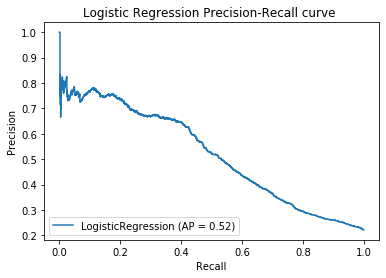

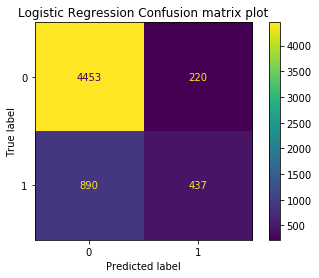

In [180]:
# predicting on test dataset
test_predicted_labels, test_predicted_proba = predictions(lr_model, x_test)
display_model_performance_metrics(lr_model, 'Logistic Regression', x_test, y_test, 
                                test_predicted_labels, test_predicted_proba, classes=classes)

F1 score of positive class(defaulted/bad customers) is only 44%.<br>
Recall of negative(default=0) class is 95% (very high) whereas only 32% for positive class(default=1)<br>
False positives = 220<br>
False negatives = 890<br>

### Logistic Regression with class weight

In [181]:
lr_model_balanced = LogisticRegression(solver='lbfgs', class_weight='balanced')
lr_model_balanced.fit(x_train, y_train)
cross_validation(lr_model_balanced, x_train, y_train)

Mean ROC AUC: 0.763
F1 score: 0.794


Model Performance metrics:
Tested on  data : Number of samples =  6000  Number of features =  23
------------------------------
             Avg accuracy  Avg precision  Avg recall  Avg f1_score
performance        0.7757         0.7841      0.7757        0.7795
Model classification report :
------------------------------
              f1-score  precision  recall   support
1               0.5176     0.4935  0.5441 1327.0000
0               0.8539     0.8667  0.8414 4673.0000
accuracy        0.7757     0.7757  0.7757    0.7757
macro avg       0.6857     0.6801  0.6928 6000.0000
weighted avg    0.7795     0.7841  0.7757 6000.0000


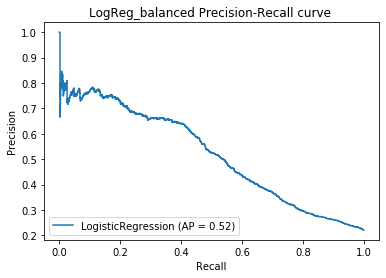

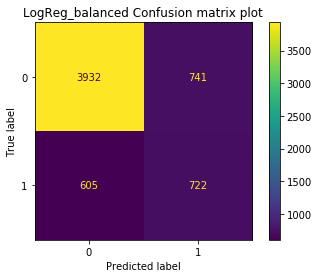

In [182]:
# predicting on test dataset
test_predicted_labels, test_predicted_proba = predictions(lr_model_balanced, x_test)
display_model_performance_metrics(lr_model_balanced, 'LogReg_balanced', x_test, y_test, 
                                test_predicted_labels, test_predicted_proba, classes=classes)

There has been an improvement in F1, recall, FP and FN. <br>
F1 score of positive class = 51% (improvement of 15%).<br>
Recall of positive class = 54% (improvement of 68%). <br>
Number of FP = 741 (increased from before)
Number of FN = 605 (decreased from before). FN has more impact than FP. <br>
This suggests that class weights loss functions are effective for this dataset. Might not require sampling.<br>

### Random Forest

In [183]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 10)
rf_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [184]:
cross_validation(rf_model, x_train, y_train)

Mean ROC AUC: 0.732
F1 score: 0.782


F1 score and ROC AUC remains similar to LogReg. Can try with larger number of trees.

In [186]:
rf_model = RandomForestClassifier(n_estimators = 100)
rf_model.fit(x_train,y_train)

cross_validation(rf_model, x_train, y_train)

Mean ROC AUC: 0.764
F1 score: 0.797


Slightly better F1 score and AUC.<br>
Model took too long to train. 100 n_estimators is probably too high. <br>
Will use hyper parameter tuning using RandomizedSearchCV for random forest <br>
Fit the model that gives the best results.

### Hyper parameter tuning for Random Forest

In [189]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

rf_model = RandomForestClassifier(random_state=1)

# search grid/parameters
params = {'n_estimators': randint(5,30),
          'criterion' : ['gini','entropy'],
          'max_depth' : randint(2,10),
          'min_samples_split' : randint(2,20),
          'min_samples_leaf' : randint(1,20),
          'max_features' : randint(2,18)}
# define k-fold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

rand_search_rf_model = RandomizedSearchCV( rf_model, param_distributions = params, random_state = 1, cv=cv)
rand_search_rf_model.fit(x_train, y_train)
rand_search_rf_model.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 14,
 'min_samples_leaf': 11,
 'min_samples_split': 16,
 'n_estimators': 23}

### Weighted Random Forest
Since the RF classifier tends to be biased towards the majority class, we shall place a heavier penalty on misclassifying the minority class.<br>
Class weighting is done based on the class distribution in each bootstrap sample, instead of the entire training dataset.<br>

In [191]:
rf_model_balanced = RandomForestClassifier(**rand_search_rf_model.best_params_, class_weight='balanced_subsample')
rf_model_balanced.fit(x_train,y_train)
cross_validation(rf_model_balanced, x_train, y_train)

Mean ROC AUC: 0.775
F1 score: 0.794


Not a significant improvement in the score.<br>

Model Performance metrics:
Tested on  data : Number of samples =  6000  Number of features =  23
------------------------------
             Avg accuracy  Avg precision  Avg recall  Avg f1_score
performance        0.7845         0.7904      0.7845        0.7872
Model classification report :
------------------------------
              f1-score  precision  recall   support
1               0.5303     0.5119  0.5501 1327.0000
0               0.8602     0.8695  0.8511 4673.0000
accuracy        0.7845     0.7845  0.7845    0.7845
macro avg       0.6953     0.6907  0.7006 6000.0000
weighted avg    0.7872     0.7904  0.7845 6000.0000


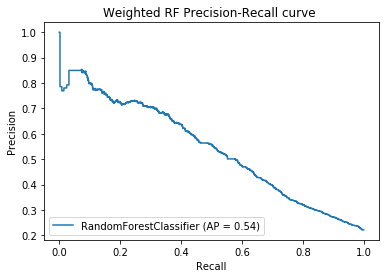

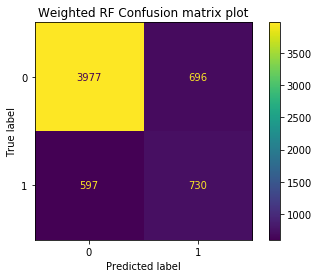

In [192]:
# predicting on test dataset
test_predicted_labels, test_predicted_proba = predictions(rf_model_balanced, x_test)
display_model_performance_metrics(rf_model_balanced, 'Weighted RF', x_test, y_test, 
                                test_predicted_labels, test_predicted_proba, classes=classes)

Seeing an increase in F1 score and recall for positive class. <br>
Number of FP=696 , a significant decrease from before<br>
Number of FN = 597, decreased from before.<br>
However, the area under the Precision-recall curve is still only 54% (just 4% above random). Might need to look into techniques to improve this.<br>
<br>
Class weighted random forest is a better model than LogReg.

### Random undersampling with Random Forest
Using BalancedRandomForest class from imblearn package, random undersampling of the majority class is done for each bootstrap sample.

In [193]:
from imblearn.ensemble import BalancedRandomForestClassifier

rf_model_balanced_undersample = BalancedRandomForestClassifier(n_estimators=23, criterion='gini', max_depth=5, max_features=14,
                                                     min_samples_leaf=11, min_samples_split=16)
rf_model_balanced_undersample.fit(x_train,y_train)
cross_validation(rf_model_balanced_undersample, x_train, y_train)

Mean ROC AUC: 0.775
F1 score: 0.794


Not much difference. <br>
This also hints that undersampling might not lead to better results. <br>

Model Performance metrics:
Tested on  data : Number of samples =  6000  Number of features =  23
------------------------------
             Avg accuracy  Avg precision  Avg recall  Avg f1_score
performance        0.7777         0.7886      0.7777        0.7824
Model classification report :
------------------------------
              f1-score  precision  recall   support
1               0.5286     0.4977  0.5637 1327.0000
0               0.8545     0.8712  0.8384 4673.0000
accuracy        0.7777     0.7777  0.7777    0.7777
macro avg       0.6916     0.6845  0.7011 6000.0000
weighted avg    0.7824     0.7886  0.7777 6000.0000


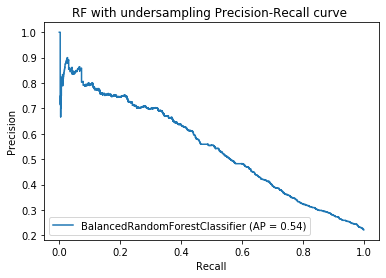

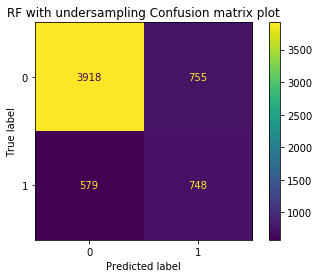

In [194]:
# predicting on test dataset
test_predicted_labels, test_predicted_proba = predictions(rf_model_balanced_undersample, x_test)
display_model_performance_metrics(rf_model_balanced_undersample, 'RF with undersampling', x_test, y_test, 
                                test_predicted_labels, test_predicted_proba, classes=classes)

Not much difference in results. <br>
Moving on to XGBoost. <br>

### Simple XGBoost

In [210]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier( max_depth=5, min_child_weight=1, gamma=0, n_jobs=-1, objective='binary:logistic',
                            seed=27, tree_method='gpu_hist')
xgb_model.fit(x_train, y_train)

cross_validation(xgb_model, x_train, y_train)

Mean ROC AUC: 0.770
F1 score: 0.794


Model Performance metrics:
Tested on  data : Number of samples =  6000  Number of features =  23
------------------------------
             Avg accuracy  Avg precision  Avg recall  Avg f1_score
performance        0.8150         0.7963      0.8150        0.7949
Model classification report :
------------------------------
              f1-score  precision  recall   support
1               0.4669     0.6437  0.3662 1327.0000
0               0.8881     0.8397  0.9424 4673.0000
accuracy        0.8150     0.8150  0.8150    0.8150
macro avg       0.6775     0.7417  0.6543 6000.0000
weighted avg    0.7949     0.7963  0.8150 6000.0000


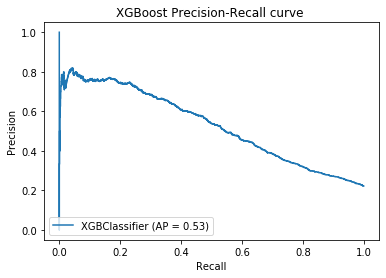

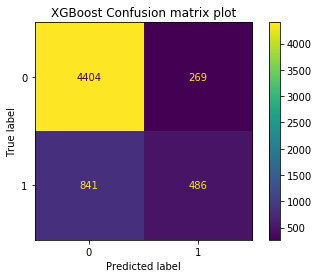

In [211]:
# predicting on test dataset
test_predicted_labels, test_predicted_proba = predictions(xgb_model, x_test)
display_model_performance_metrics(xgb_model, 'XGBoost', x_test, y_test, 
                                test_predicted_labels, test_predicted_proba, classes=classes)

Seeing a decrease in F1 score and recall for positive class.<br>
FPs have decreased significantly(only 269). However, FNs have increased. <br>
<br>
Will give gridsearchCV a shot.

### XGBoost with GridSearchCV

In [222]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, auc

xgb_classifier = xgb.XGBClassifier(min_child_weight=1, n_jobs=-1, objective='binary:logistic',
                    seed=27, tree_method='gpu_hist')
parameters = {
    'gamma':[0,5], # min loss required to make further partitions, regularization parameter
    'max_depth': range (2, 10, 1), # max depth of tree, increasing this value leads to overfit
    'n_estimators': range(20, 100, 20), # number of trees
    'learning_rate': [0.1, 0.01, 0.05]
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

grid_search = GridSearchCV( estimator=xgb_classifier, param_grid=parameters, cv=cv,
                                return_train_score=True, scoring='roc_auc',verbose=1)
grid_search.fit(x_train, y_train, eval_metric='auc')
xgbc_model = grid_search.best_estimator_

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed:  9.2min finished


In [213]:
print('Best hyperparameters:')
print(grid_search.best_params_)
print('Best normalized gini score')
print(grid_search.best_score_ * 2 - 1)
results = pd.DataFrame(grid_search.cv_results_)
#print(results)

Best hyperparameters:
{'gamma': 5, 'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 80}
Best normalized gini score
0.5671058968787563


Model Performance metrics:
Tested on  data : Number of samples =  6000  Number of features =  23
------------------------------
             Avg accuracy  Avg precision  Avg recall  Avg f1_score
performance        0.8150         0.7963      0.8150        0.7949
Model classification report :
------------------------------
              f1-score  precision  recall   support
1               0.4669     0.6437  0.3662 1327.0000
0               0.8881     0.8397  0.9424 4673.0000
accuracy        0.8150     0.8150  0.8150    0.8150
macro avg       0.6775     0.7417  0.6543 6000.0000
weighted avg    0.7949     0.7963  0.8150 6000.0000


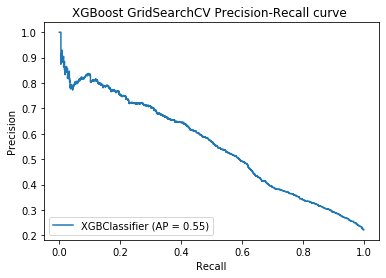

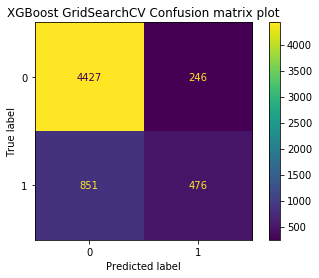

In [214]:
# predicting on test dataset
test_predicted_labels, test_predicted_proba = predictions(xgb_model, x_test)
display_model_performance_metrics(xgbc_model, 'XGBoost GridSearchCV', x_test, y_test, 
                                test_predicted_labels, test_predicted_proba, classes=classes)

### Oversampling

In [204]:
from imblearn.over_sampling import RandomOverSampler
def oversample(x, y, random_state=3):
        """
        Oversamples the minority class to reach a ratio by default equal to 1 between the majority and mionority classes
        Sampling strategy = 0.5 
        Minority class is oversampled to half the number of examples as the majority class
        Params :
            x : training features
            y : training label
        Returns :
            x_over : over sampled training data
            y_over : over sampled training label
        """
        
        oversample = RandomOverSampler(sampling_strategy=0.5, random_state=random_state)
        x_over , y_over = oversample.fit_resample(x, y)
        return x_over, y_over

In [205]:
# Use XGBoost model for this oversampled dataset
x_over, y_over = oversample(x_train, y_train)

In [223]:
grid_search.fit(x_over, y_over, eval_metric='auc', verbose=1)
xgbc_model_oversampled = grid_search.best_estimator_

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed: 11.0min finished


Model Performance metrics:
Tested on  data : Number of samples =  6000  Number of features =  23
------------------------------
             Avg accuracy  Avg precision  Avg recall  Avg f1_score
performance        0.8150         0.7963      0.8150        0.7949
Model classification report :
------------------------------
              f1-score  precision  recall   support
1               0.4669     0.6437  0.3662 1327.0000
0               0.8881     0.8397  0.9424 4673.0000
accuracy        0.8150     0.8150  0.8150    0.8150
macro avg       0.6775     0.7417  0.6543 6000.0000
weighted avg    0.7949     0.7963  0.8150 6000.0000


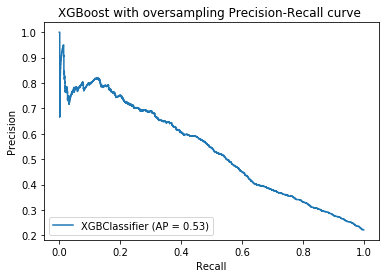

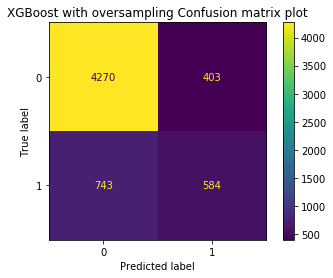

In [216]:
# predicting on test dataset
test_predicted_labels, test_predicted_proba = predictions(xgb_model, x_test)
display_model_performance_metrics(xgbc_model_oversampled, 'XGBoost with oversampling', x_test, y_test, 
                                test_predicted_labels, test_predicted_proba, classes=classes)

Still not good a performance. <br>
This can be because the over sampling does not add additional information. <br>
Oversampling just replicates the minority datapoints.<br>


**Future Work** <br>
Try SMOTE technique.<br>
SMOTE syntetically generates minority samples, leading to additional info.<br>
Need to make sure there is enough seperation between majority samples and minority samples in the feature space. <br>
Otherwise, applying SMOTE might lead to increased ambiguity.<br>

### XGBoost Feature importance plot

In [219]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object', name=0)

In [220]:
feature_names = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

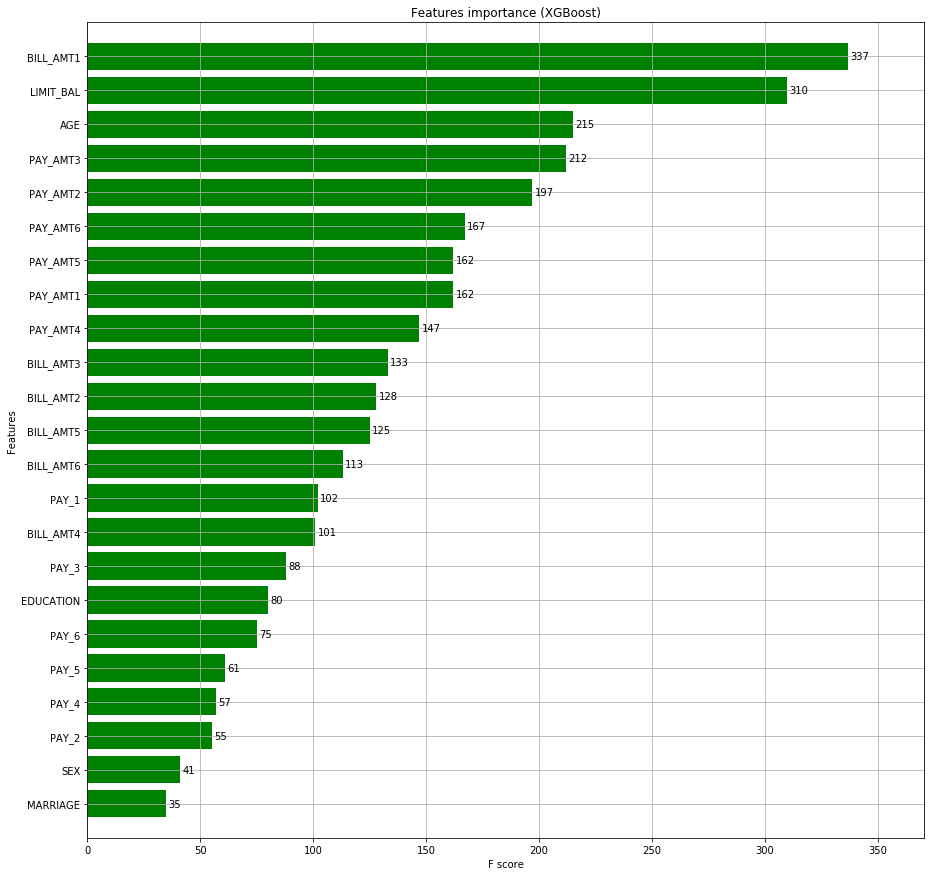

In [221]:

fig, (ax) = plt.subplots(ncols=1, figsize=(15,15))
xgbc_model.get_booster().feature_names = feature_names
xgb.plot_importance(xgbc_model.get_booster(), height=0.8, title="Features importance (XGBoost)", ax=ax, color="green") 
plt.show()

BILL_AMT1 and LIMIT_BAL is of highest feature importance. <br>
Feature importance of SEX, MARRIAGE is the least. <br>
AGE feature is in high importance. This feature can be further explored by categorizing the feature using bins and exploring the importance of each bin. Example : teenage group (11 to 20) vs graduate students (21-30) vs middle age (31-40) vs older(41-55) vs seniors(56-79). <br>
SEX and MARRIAGE is also a categorical feature that has not been one-hot encoded. <br>


LIMIT_BAL and BILL_AMT1 had a negative correlation with the target variable (default). <br>
Higher the LIMIT_BAL the less riskier is the customer. The company can aim at introducing / recommending ways to increase the clients credit limit. <br>
BILL_AMT1 is the bill amount for the month of Sept. The higher the bill amount, less riskier is the customer. The customer who has enough credit balance and who spends is less risky.

**Future Work**<br>
SHAP library provides more accurate feature importance. <br>
Can explore other models(like lightGBM, neural network) for better performance.<br>
